<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget 'https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png' -O gyujin.png

--2025-04-06 06:02:14--  https://raw.githubusercontent.com/KimSeonHo-719/CV/main/gyujin.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222295 (217K) [image/png]
Saving to: ‘gyujin.png’

gyujin.png          100%[===================>] 217.08K  --.-KB/s    in 0.004s  

2025-04-06 06:02:15 (58.8 MB/s) - ‘gyujin.png’ saved [222295/222295]



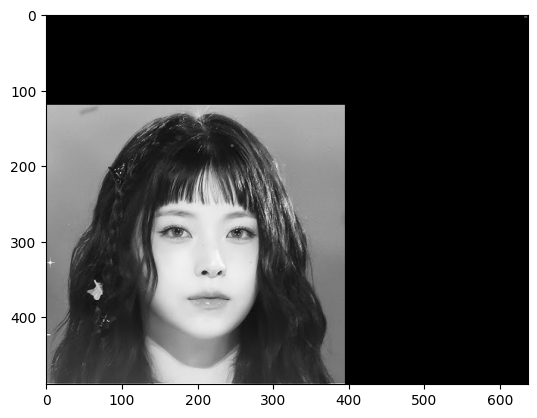

In [3]:
img_BGR=cv2.imread('/content/gyujin.png')
# 왜 꼭 GRAY로 해야 할까?
# 유튜브 실습 영상에도 나오지만 BGR, RGB는 3채널이므로 2차원 계산을 할 수 없기 때문에 흑백 2차원으로 바꿔야 한다.
img_GRAY = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)
plt.imshow(img_GRAY,cmap='gray')

In [10]:
# Convolution
def conv(img, kernel):
    h, w = kernel.shape # kernel size 구하기, 사실 과제에서는 높이 너비 모두 같게 설정해서 변수 하나만 해도 될 것 같다.
    img_h, img_w = h//2, w//2 # kernel 중심 기준 사이즈 측정

    # 이미지 경계에 패딩을 추가할 때 mode='reflect' 를 반드시 작성하여 이미지 경계를 반사하여 채워야 한다.
    # 그렇지 않으면 경계 효과가 발생하여 이미지 모서리에서 결과가 좀 달라진다고 한다. - ChatGPT
    padding=np.pad(img,((img_h,img_h),(img_w,img_w)),mode='reflect')
    output=np.zeros_like(img,dtype=np.float32)

    # 이중 루프를 이용해 2-2때 응용수학에서 배웠던 컨벌루션을 직접 구현한다.
    # 이때 region 변수를 이용해 패딩된 이미지에서 커널 크기만큼의 영역을 추출해야 한다. - 컴퓨터비전과 딥러닝(오일석)
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        region=padding[i:i+h,j:j+w]
        output[i,j]=np.sum(region*kernel)

    return output

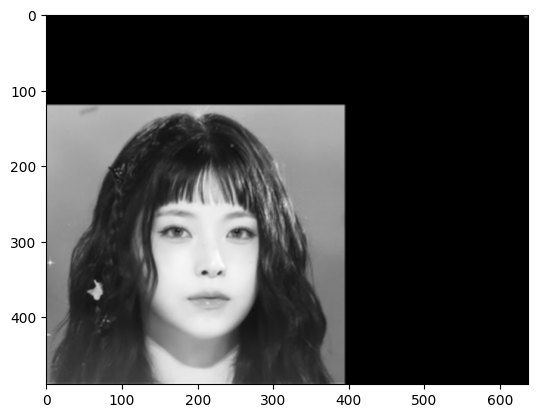

In [5]:
# Average Filter 3x3
# 반드시 모든 필터에는 정규화 과정을 까먹으면 안된다.
kernel33=np.ones((3,3),dtype=np.float32)/9
conv(img_GRAY,kernel33)
result33=conv(img_GRAY,kernel33)
plt.imshow(result33,cmap='gray')

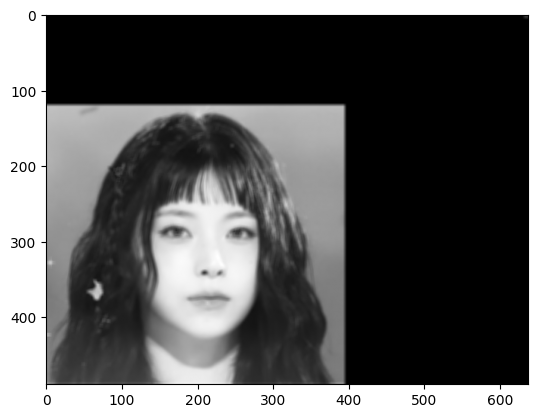

In [6]:
# Average Filter 5x5
kernel55=np.ones((5,5),dtype=np.float32)/25
conv(img_GRAY,kernel55)
result55=conv(img_GRAY,kernel55)
plt.imshow(result55,cmap='gray')

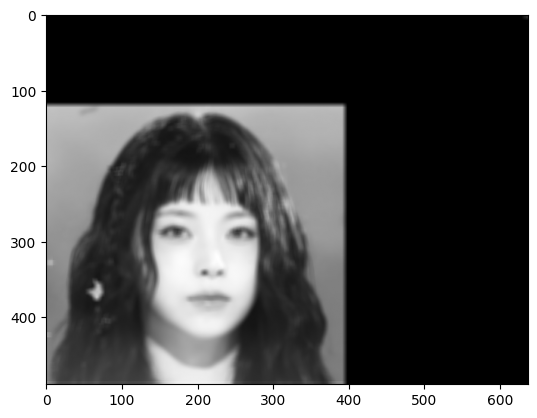

In [7]:
# Average Filter 7x7
kernel77=np.ones((7,7),dtype=np.float32)/49
conv(img_GRAY,kernel77)
result77=conv(img_GRAY,kernel77)
plt.imshow(result77,cmap='gray')

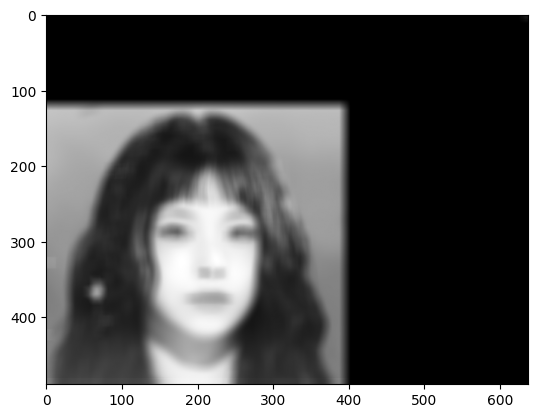

In [8]:
# Average Filter 15x15
kernel15=np.ones((15,15),dtype=np.float32)/225
conv(img_GRAY,kernel15)
result15=conv(img_GRAY,kernel15)
plt.imshow(result15,cmap='gray')